In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df= pd.read_csv('../..\Data\Insurance/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
scaler= MinMaxScaler()
cols = ['age','bmi','charges']
for i in cols:
    df[i]=scaler.fit_transform(df[i].values.reshape(-1,1))
df[cols]

,age,bmi,charges
0,0.021739,0.321227,0.251611
1,0.000000,0.479150,0.009636
2,0.217391,0.458434,0.053115
3,0.326087,0.181464,0.333010
4,0.304348,0.347592,0.043816
...,...,...,...
1333,0.695652,0.403820,0.151299
1334,0.000000,0.429379,0.017305
1335,0.000000,0.562012,0.008108
1336,0.065217,0.264730,0.014144


In [7]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
df=pd.get_dummies(df, columns=['sex', 'smoker', 'region'], dtype=int)

<AxesSubplot:>

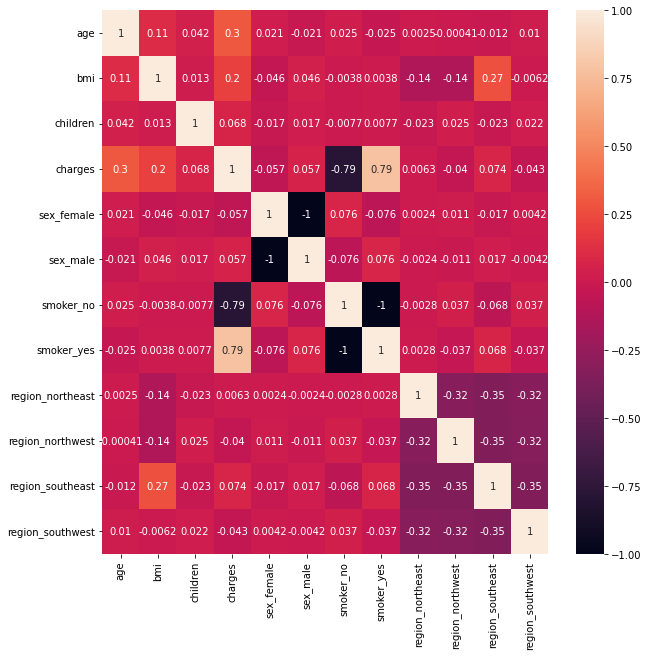

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

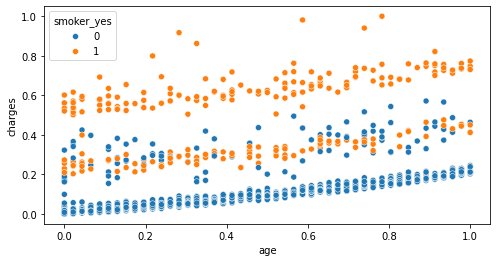

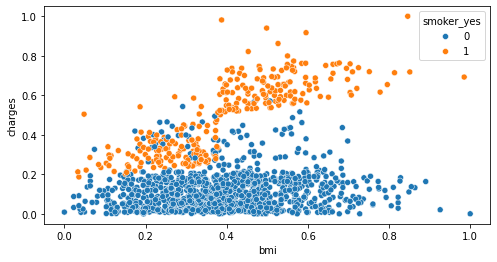

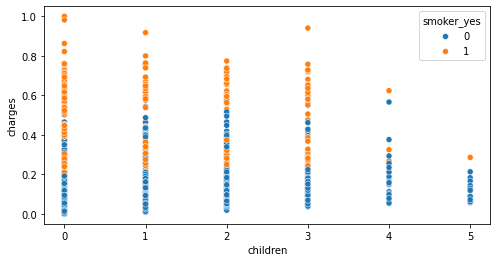

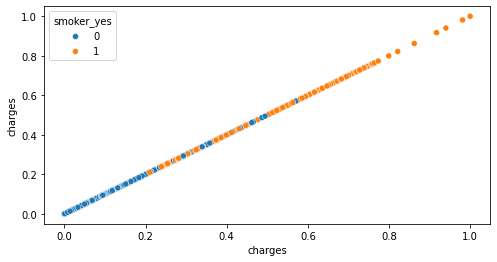

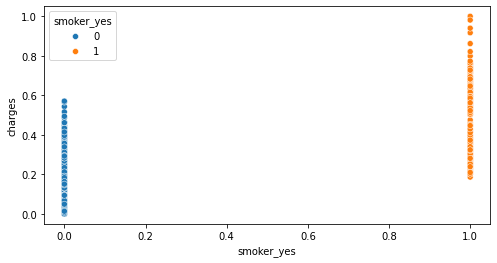

In [10]:
columns = ['age', 'bmi', 'children', 'charges', 'smoker_yes']
for i in columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(df, x=i, y='charges', hue='smoker_yes')
    plt.show()

### Preparing data for training and testing:

In [11]:
df.shape

(1338, 12)

In [12]:
x=df.drop(columns=['charges'])
y=df['charges']

In [13]:
# x = np.array(df.drop(columns=['charges']))
# y=np.array(df['charges'])

In [ ]:
# y=y.reshape(-1,1)
# y.shape

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Train and Testing

### XGB predictions

In [26]:
model_xgb = xgb.XGBRFRegressor(max_depth=30 , n_estimators = 100)

model_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=30, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [27]:
result=model_xgb.score(x_test,y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.8397583151411105


In [28]:
y_predict=model_xgb.predict(x_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE= float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'3f'))
MSE= mean_squared_error(y_test,y_predict)
MAE= mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.080536 
MSE = 0.006486093240528092 
MAE = 0.045528343143992164 
R2 = 0.8397583151411105


<AxesSubplot:>

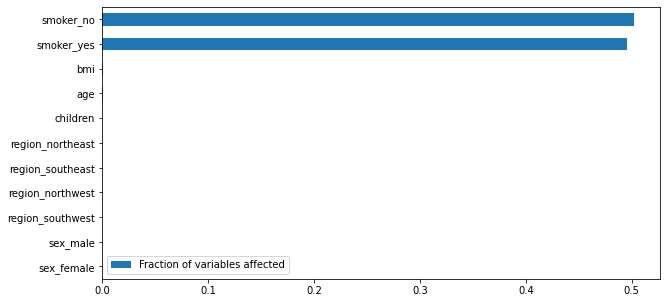

In [30]:
x=pd.DataFrame(x)
feat_scores=pd.DataFrame({'Fraction of variables affected': model_xgb.feature_importances_}, index=x.columns)
feat_scores=feat_scores.sort_values(by = 'Fraction of variables affected')
feat_scores.plot(kind='barh', figsize=(10,5))

### RandomForestRegressor predictions

In [31]:
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
result=model_rf.score(x_test,y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.8530831654376422


In [33]:
y_predict=model_rf.predict(x_test)

In [34]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'3f'))
MSE= mean_squared_error(y_test,y_predict)
MAE= mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.077115 
MSE = 0.0059467440598483575 
MAE = 0.04463711621632087 
R2 = 0.8530831654376422


<AxesSubplot:>

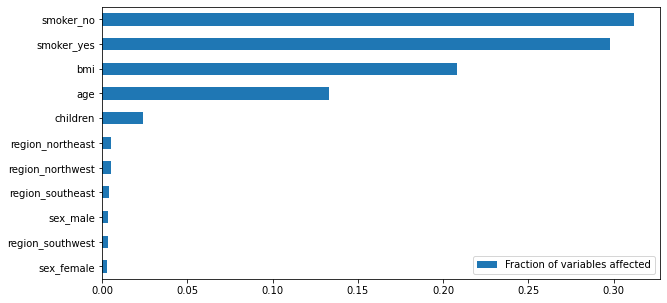

In [37]:
# x=pd.DataFrame(x)
feat_scores=pd.DataFrame({'Fraction of variables affected': model.feature_importances_}, index=x.columns)
feat_scores=feat_scores.sort_values(by = 'Fraction of variables affected')
feat_scores.plot(kind='barh', figsize=(10,5))